In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Arpan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [65]:
#import dataset
import numpy as np
import pandas as pd

tw_df = pd.read_json('Data/dennis_king.json', lines=True) 
tw_df.head(3)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1413583875884867589,1413583875884867584,2021-07-10 01:10:33 India Standard Time,2021-07-10,01:10:33,530,1206179328,dennyking,Dennis King,,...,,,,,,[],,,,
1,1409189420629168137,1409189417953210368,2021-06-27 22:08:34 India Standard Time,2021-06-27,22:08:34,530,1206179328,dennyking,Dennis King,,...,,,,,,[],,,,
2,1409189417953210374,1409189417953210368,2021-06-27 22:08:33 India Standard Time,2021-06-27,22:08:33,530,1206179328,dennyking,Dennis King,,...,,,,,,[],,,,


In [66]:
#breaking into lines
all_sentences = []

for word in tw_df['tweet']:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


print(lines)

['✅', 'Second', 'shot', 'of', 'COVID-19', 'vaccine', 'Thank', 'you', 'to', 'the', 'staff', 'and', 'volunteers', 'who', 'are', 'keeping', 'our', 'vaccine', 'clinics', 'running', 'so', 'smoothly.', 'Keep', 'up', 'the', 'great', 'work,', 'Islanders!', '#VaccinatePEI', 'https://t.co/RIsgEfOoUU', 'Thanks', 'to', 'Ryan', 'Neale,', 'Manager', 'of', 'Environmental', 'Health,', 'and', 'his', 'dedicated', 'team', 'for', 'all', 'their', 'hard', 'work', 'making', 'today', 'a', 'reality.', 'As', 'they', 'say', 'on', 'the', 'radio', '-', '‘traffic', 'is', 'flowing', 'smoothly', 'on', 'the', 'Confederation', 'Bridge’', 'Dr.', 'Morrison', 'and', 'I', 'stopped', 'by', 'the', '@confedbridge', 'this', 'morning', 'to', 'say', 'thank', 'you', 'to', 'the', 'border', 'staff', 'who', 'are', 'welcoming', 'our', 'friends,', 'family', 'and', 'visitors', 'back', 'to', 'Prince', 'Edward', 'Island.', 'https://t.co/5GUg1GhYyq', 'Islanders', 'have', 'put', 'in', 'the', 'hard', 'work', 'and', 'now', '-', 'it’s', 'show

In [67]:
#Removing Punctuation

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [68]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['second',
 'shot',
 'of',
 'covid19',
 'vaccin',
 'thank',
 'you',
 'to',
 'the',
 'staff',
 'and',
 'volunt',
 'who',
 'are',
 'keep',
 'our',
 'vaccin',
 'clinic',
 'run',
 'so',
 'smooth',
 'keep',
 'up',
 'the',
 'great',
 'work',
 'island',
 'vaccinatepei',
 'httpstcorisgefoouu',
 'thank',
 'to',
 'ryan',
 'neal',
 'manag',
 'of',
 'environment',
 'health',
 'and',
 'his',
 'dedic',
 'team',
 'for',
 'all',
 'their',
 'hard',
 'work',
 'make',
 'today',
 'a',
 'realiti',
 'as',
 'they',
 'say',
 'on',
 'the',
 'radio',
 'traffic',
 'is',
 'flow',
 'smooth',
 'on',
 'the',
 'confeder',
 'bridg',
 'dr',
 'morrison',
 'and',
 'i',
 'stop',
 'by',
 'the',
 'confedbridg',
 'this',
 'morn',
 'to',
 'say',
 'thank',
 'you',
 'to',
 'the',
 'border',
 'staff',
 'who',
 'are',
 'welcom',
 'our',
 'friend',
 'famili',
 'and',
 'visitor',
 'back',
 'to',
 'princ',
 'edward',
 'island',
 'httpstco5gug1ghyyq',
 'island',
 'have',
 'put',
 'in',
 'the',
 'hard',
 'work',
 'and',
 'now',
 'it',

In [69]:
#Removing all Stop Words

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['second',
 'shot',
 'covid19',
 'vaccin',
 'thank',
 'staff',
 'volunt',
 'vaccin',
 'clinic',
 'run',
 'smooth',
 'great',
 'work',
 'island',
 'vaccinatepei',
 'httpstcorisgefoouu',
 'thank',
 'ryan',
 'neal',
 'manag',
 'environment',
 'health',
 'dedic',
 'team',
 'hard',
 'work',
 'today',
 'realiti',
 'radio',
 'traffic',
 'flow',
 'smooth',
 'confeder',
 'bridg',
 'dr',
 'morrison',
 'stop',
 'confedbridg',
 'morn',
 'thank',
 'border',
 'staff',
 'welcom',
 'friend',
 'famili',
 'visitor',
 'princ',
 'edward',
 'island',
 'httpstco5gug1ghyyq',
 'island',
 'hard',
 'work',
 'showtim',
 'cant',
 'wait',
 'famili',
 'friend',
 'visitor',
 'arriv',
 'find',
 'info',
 'travel',
 'pei',
 'httpstcovedxefojev',
 'httpstcovd54naprmm',
 'big',
 'deal',
 'island',
 'amp',
 'need',
 'come',
 'peac',
 'resolut',
 'quick',
 'possibl',
 'afternoon',
 'conven',
 'atlant',
 'premier',
 'discuss',
 'blockad',
 'remain',
 'hope',
 'resolv',
 'quick',
 'allow',
 'safe',
 'travel',
 'region',
 'bl

In [70]:
tw_df_st = pd.DataFrame(stem2)

tw_df_st = tw_df_st[0].value_counts()

In [71]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in tw_df_st:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 278, 2: 63, 3: 22, 4: 9, 5: 3, 12: 2, 8: 2, 6: 2, 21: 1, 9: 1, ...})

In [37]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\arpan\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


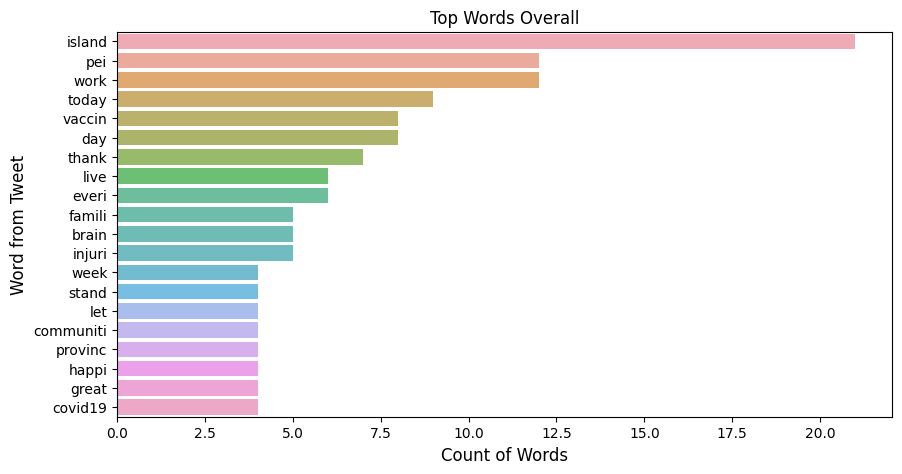

In [72]:
#This is a simple plot that shows the top 20 words being used
#df.plot(20)

tw_df_st = tw_df_st[:20,]
plt.figure(figsize=(10,5))
sns.barplot(tw_df_st.values, tw_df_st.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [39]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [26]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [73]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

c:\users\arpan\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


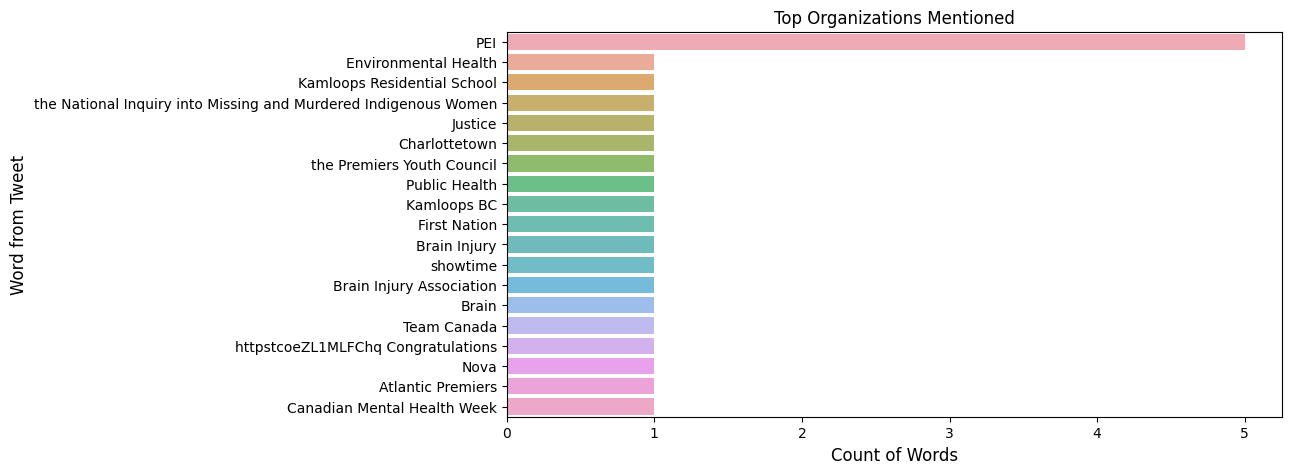

In [74]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [75]:
df.to_csv("king_count.csv")